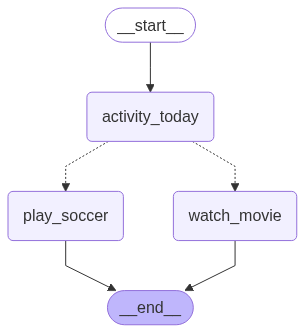

In [11]:
# Build a simple workflow or Graph using Langgraph
# State  - Whenever u r building any workflow using Langgraph the first thing to defines is State
# of the graph . State is an input data structure for all nodes and edges in the graph
# State is the medium of communication within the graph
# To access element in this state State['graph_info']
from typing_extensions import TypedDict
class State(TypedDict):
    graph_info: str

# Node
# Nodes are in a  way python functions 
# The first argument in a node has to be state 
# Because the state is a datastructure as defined above , 
# each node can access the key graph_info and can change the value

def activity_today(state: State):
    print(" Activity today node has been called")
    print(state['graph_info'])
    return {"graph_info":state['graph_info'] + " I am planning to do sth today"}

def play_soccer(state: State):
    print(" Soccer node has been called")
    return {"graph_info":state['graph_info'] + " I will play soccer"}

def watch_movie(state: State):
    print("Watch movie node has been called")
    return {"graph_info":state['graph_info'] + " watch movie"}

import random
from typing import Literal
def random_activtiy_decide(state:State)-> Literal["play_soccer","watch_movie"]:
    print("In random activity decider mode")
    graph_info = state['graph_info']

    if random.random() > 0.5:
        return "play_soccer"
    else:
        return "watch_movie"


# Edges 
# Graph Construction 
# Now we will build the graph from the components above
# For that StateGraph class will be the one that we have to use

from langgraph.graph import StateGraph, START,END
graph = StateGraph(State)

# Adding the nodes
graph.add_node("activity_today",activity_today)
graph.add_node("play_soccer",play_soccer)
graph.add_node("watch_movie",watch_movie)

# Edges connector
graph.add_edge(START,"activity_today")
graph.add_conditional_edges("activity_today",random_activtiy_decide)
graph.add_edge("play_soccer",END)
graph.add_edge("watch_movie",END)

graph_builder = graph.compile()

from IPython.display import Image,display
display(Image(graph_builder.get_graph().draw_mermaid_png()))



# Stategraph


In [12]:
graph_builder.invoke({"graph_info":"Hey help me tell what should I do today?"})

 Activity today node has been called
Hey help me tell what should I do today?
In random activity decider mode
 Soccer node has been called


{'graph_info': 'Hey help me tell what should I do today? I am planning to do sth today I will play soccer'}